In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_inp,train_op),(test_inp,test_op) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
train_inp.shape

(60000, 28, 28)

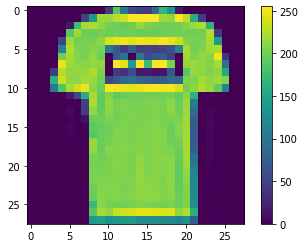

In [13]:
plt.figure()
plt.imshow(train_inp[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_inp = train_inp/255.0
test_inp = test_inp/255.0

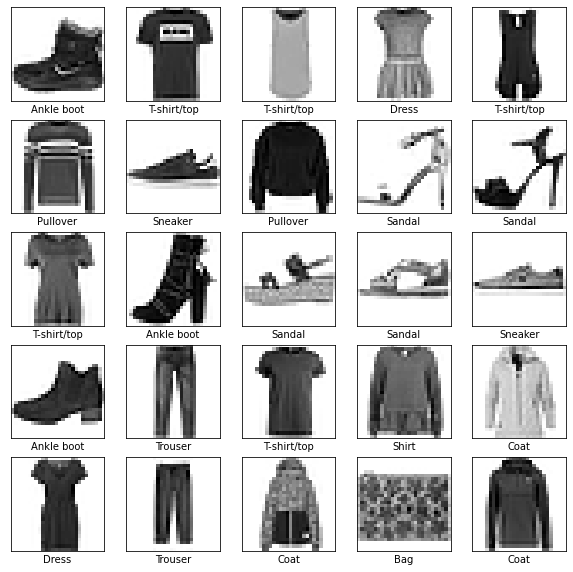

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_inp[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_op[i]])

In [17]:
model = tf.keras.Sequential([
            
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(128,activation="relu"),
            tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [20]:
model.fit(train_inp,train_op,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6285 - accuracy: 0.7789
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3891 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3453 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3148 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3028 - accuracy: 0.8877
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2712 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2583 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2462 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.231

In [23]:
test_loss, test_acc = model.evaluate(test_inp,  test_op, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3630 - accuracy: 0.8742

Test accuracy: 0.8741999864578247


In [24]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_inp)

In [26]:
np.argmax(predictions[0])

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

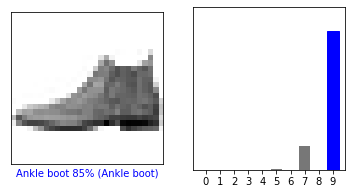

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_op, test_inp)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_op)
plt.show()

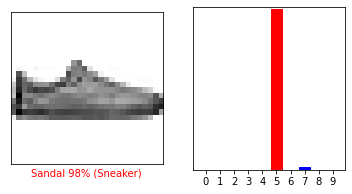

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],  test_op, test_inp)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_op)
plt.show()

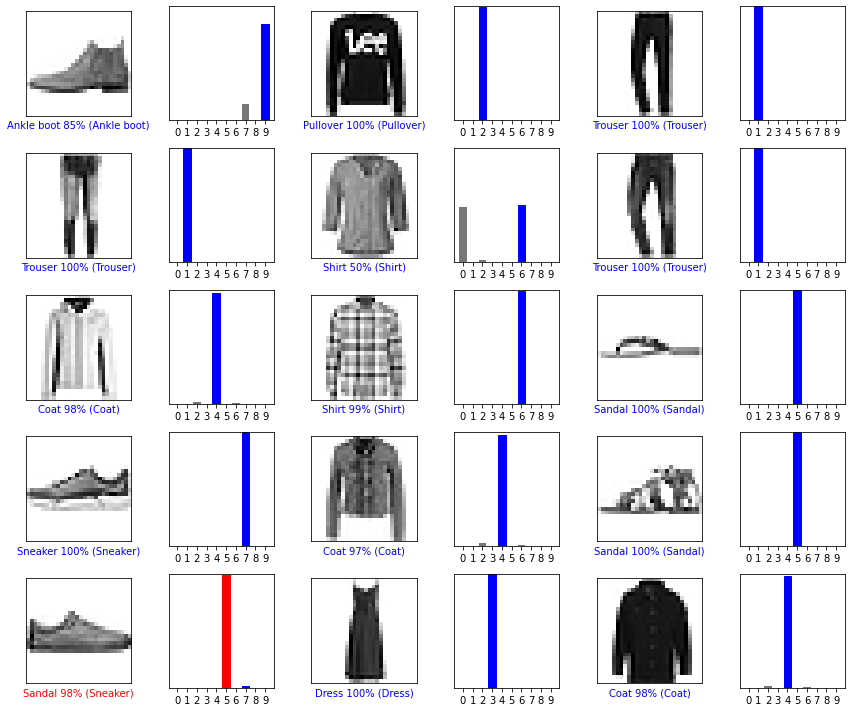

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_op, test_inp)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_op)
plt.tight_layout()
plt.show()